Connected to integrating (Python 3.11.5)

In [1]:
from PointList import *
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
c = PointList()
c.add_point((2,3,0))
c.add_point((1,7,2))
c.add_point((5,9,0))
c.add_point((10,8,5))
c.add_point((11,4,-2))



In [6]:
from PointList import *
from Triangle import *


class TriangularMesh:
    def __init__(self, boundary : PointList, desired_triangle_count):
        self.boundary = boundary 
        self.m = desired_triangle_count
        self.mesh = []
        self.n = len(boundary.points)
        self.v_indexes = [] #the vertexes indices
        self.mapping = [] #contains the mapping from I(v_indexes) to R^3
        self.triangles  = []  #each triangle is 
        self.N = {} #les indices des voisins 
        self.N_vertexes = 0 # the number of nodes in the meshing
        self.w = None
        self.dict_vertexes = {}
        

    def compute_central_point(self):
        return self.boundary.average_point()
        
         
    def create_initial_subdivisions(self):
        #  Create initial subdivisions using the central point
        C = self.compute_central_point()
        s = int(self.m/(2*self.n) - 1/2)
        triangle = self.boundary.points + [self.boundary.points[0]]
        P = [triangle]
        for j in range(1,s+1):
            P_j = triangle + (j / (s+1))*(C - triangle)
            P.append(P_j)
        
        return np.array(P)
        

    def create_quadrilaterals(self):
        #split the outside quadrilaterals
        P = (self.create_initial_subdivisions())
        s = int(self.m/(2*self.n) - 1/2)
        for j in tqdm(range(s)) : 
            for i in range(self.n) :
                self.mesh.append([P[j,i],P[j+1,i+1],P[j,i+1]])
                self.mesh.append([P[j,i],P[j+1,i+1],P[j+1,i]])
        
        


    def split_quadrilateral(self):
        C = self.compute_central_point()
        P = self.create_initial_subdivisions()
        for i in tqdm(range(self.n)) :
            self.mesh.append([C,P[-1,i],P[-1,i+1]])

    def further_subdivide(self):
        while len(self.mesh) < self.m :
            k = np.random.randint(0,len(self.mesh))
            tri = np.array(self.mesh.pop(k))
            C = np.mean(tri,axis = 0)
            tri1 = [tri[0],tri[1],C]
            tri2 = [tri[0],tri[2],C]
            tri3 = [tri[1],tri[2],C]
            self.mesh += [tri1,tri2,tri3]
    



    def generate_mesh_initial(self):
        self.create_quadrilaterals()
        self.further_subdivide()
        return self.mesh


    def modify_N(self,i):
        N = []
        for tr in self.triangles :
            if i in tr:
                N += list(tr)
        self.N[i] = list(set(N))


    def canonic_representation(self):
        K = np.array(self.mesh).reshape(-1,3)
        K = [tuple(x) for x in K]
        N = len(set(K))
        self.N_vertexes = N
        self.v_indexes = list(range(N))
        self.mapping = list(set(K))
        self.w = np.zeros((N,N))
        for j in self.v_indexes:
            self.dict_vertexes[j] = []

        for tri in self.mesh:
            triangle = [self.mapping.index(tuple(pt)) for pt in tri]
            self.triangles.append(triangle)
            self.dict_vertexes[triangle[0]].append(tuple(triangle))
            self.dict_vertexes[triangle[1]].append(tuple(triangle))
            self.dict_vertexes[triangle[2]].append(tuple(triangle))
        
        for i in self.v_indexes:
            self.modify_N(i)


    def area_3D(self,tr):
        v = [self.mapping[tr[0]],self.mapping[tr[1]],self.mapping[tr[2]]]
        return area_3D(v)


    def _N(self,i):
        N = []
        for tr in self.triangles :
            if i in tr:
                N += list(tr)
        return list(set(N))


    def S(self,i,j):
        S = 0
        tr_i = set(self.dict_vertexes[i])
        tr_j = set(self.dict_vertexes[j])
        intersect = list(tr_i.intersection(tr_j))
        for tr in intersect :
            S+= self.area_3D(tr)
        return S


    def calcul_weights(self,i,j) :
        S = 0
        for k in self.N[i]:
            S += self.S(i,k)
        self.w[i,j] =  self.S(i,j)/S


K = TriangularMesh(c,20)
K.create_quadrilaterals()
K.split_quadrilateral()
K.further_subdivide()
K.canonic_representation()


#draw the triangles

Triangles = K.mesh
for tri in Triangles:
    B = np.array(tri + [tri[0]])
    plt.plot(B[:,0],B[:,1])


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 3561.13it/s]


In [7]:
K = np.array(Triangles).reshape(-1,3)
K = [tuple(x) for x in K]
N = len(set(K))
v_indexes = [range(N)]
mapping = list(set(K))
S = []
for tri in Triangles:
    S.append([mapping.index(tuple(pt)) for pt in tri])


[array([5.99238549, 6.08477248, 0.97092119]), array([5.99267574, 6.08447902, 0.97064914]), array([5.99256916, 6.08458678, 0.97074904]), array([5.992601 , 6.0845546, 0.9707192]), array([5.99240409, 6.08475367, 0.97090375]), array([5.99210699, 6.08505415, 0.97118227]), array([5.9935014 , 6.08364477, 0.96987548]), array([5.99239203, 6.08476587, 0.97091506]), array([5.99408906, 6.08305113, 0.96932488]), array([5.99382191, 6.08332098, 0.96957517]), array([5.9934891 , 6.08365719, 0.969887  ]), array([5.99349574, 6.08365049, 0.96988078]), array([5.99341326, 6.08373382, 0.96995806]), array([5.99417543, 6.0829639 , 0.96924397]), array([5.99311671, 6.08403343, 0.97023593]), array([5.99280202, 6.08435142, 0.97053081]), array([5.99262143, 6.08453394, 0.97070005]), array([5.99406831, 6.08307209, 0.96934432]), array([5.99379384, 6.08334934, 0.96960148]), array([5.99418188, 6.08295739, 0.96923793]), array([5.99228745, 6.08487162, 0.97101309]), array([5.99317631, 6.08397323, 0.97018009]), array([5.992

(0.9691616491925067, 0.9712602373184841)

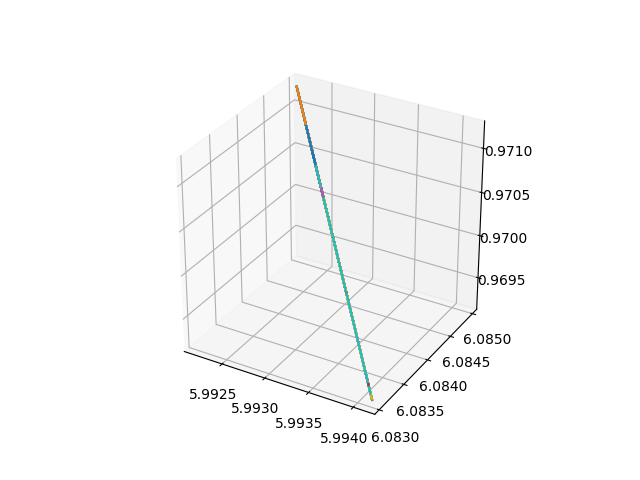

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
X = []
Y = []
Z = []
for tr in M.triangles:
    print(M.mapping)
    xs = [M.mapping[ind][0] for ind in tr] + [M.mapping[0][0]]
    ys = [M.mapping[ind][1] for ind in tr] + [M.mapping[0][1]]
    zs = [M.mapping[ind][2] for ind in tr] + [M.mapping[0][2]]
    ax.plot(xs,ys,zs)
    Z = Z + zs
    X = X + xs
    Y = Y + ys

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)



In [8]:


class Updating_Laplace(TriangularMesh):
    def __init__(self, boundary : PointList, desired_triangle_count):
        super().__init__(boundary, desired_triangle_count)

    def update_weights(self):
        "Updates the weights of the Mesh for each iteration"
        for i in tqdm(range(self.N_vertexes)):
            for j in (range(self.N_vertexes)):
                if i in self.N[j] :
                    self.calcul_weights(i,j)



    def update_mapping(self,i):
        "Updates the position of the nodes using the Laplace Fairing"
        N_i = self.N[i]
        P = np.array([0,0,0])
        for k in N_i :
            P = P + self.w[i,k]*np.array(self.mapping[k])
        print(P)
        self.mapping[i] = P
        

In [23]:
M = Updating_Laplace(c,100)
M.create_quadrilaterals()
M.split_quadrilateral()
M.further_subdivide()
M.canonic_representation()
print(M.w)

100%|██████████| 5/5 [00:00<?, ?it/s]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
M.mapping.index(tuple(M.boundary.points[2]))

20

In [18]:
for _ in range(10):
    M.update_weights()
    for i in (M.v_indexes):
        M.update_mapping(i)

100%|██████████| 54/54 [00:00<00:00, 1037.26it/s]


[5.99169733 6.08546844 0.97156629]
[5.99239171 6.08476565 0.97091514]
[5.99225615 6.08490285 0.97104225]
[5.99233479 6.0848233  0.97096853]
[5.99181008 6.08535429 0.97146054]
[5.99124246 6.08592931 0.97199305]
[5.994124   6.08301557 0.96929203]
[5.99186849 6.0852952  0.97140578]
[5.99509835 6.08203194 0.96837941]
[5.9947265  6.08240732 0.96872769]
[5.99412158 6.08301806 0.96929432]
[5.99414957 6.08298981 0.9692681 ]
[5.99416261 6.08297661 0.96925588]
[5.995344   6.08178403 0.96814935]
[5.99336498 6.0837822  0.97000313]
[5.99257593 6.08457951 0.97074251]
[5.99232203 6.08483623 0.9709805 ]
[5.99514345 6.0819864  0.96833716]
[5.99466668 6.08246766 0.9687837 ]
[5.99543446 6.08169273 0.96806464]
[5.99155557 6.08561207 0.97169929]
[5.99312799 6.08402166 0.9702252 ]
[5.99149151 6.08567695 0.97175938]
[5.99235608 6.08480185 0.9709486 ]
[5.9913215  6.08584924 0.9719189 ]
[5.99154108 6.08562671 0.97171287]
[5.99247712 6.08467935 0.9708351 ]
[5.99536967 6.0817581  0.96812531]
[5.99418368 6.082955

100%|██████████| 54/54 [00:00<00:00, 853.18it/s]


[5.99185747 6.0853064  0.97141613]
[5.99244297 6.08471391 0.97086712]
[5.99228084 6.08487797 0.97101915]
[5.99226953 6.08488943 0.97102976]
[5.99190893 6.08525431 0.97136788]
[5.99136683 6.0858033  0.97187637]
[5.99400702 6.08313377 0.96940164]
[5.9919386  6.08522432 0.97134007]
[5.99491113 6.08222094 0.96855477]
[5.99455698 6.08257847 0.96888648]
[5.99392925 6.08321236 0.96947452]
[5.99386715 6.08327509 0.96953271]
[5.9938026  6.08334025 0.96959317]
[5.99517402 6.08195559 0.96830855]
[5.99335837 6.08378896 0.97000936]
[5.99263706 6.0845178  0.97068525]
[5.99230638 6.08485215 0.97099521]
[5.9949414  6.08219037 0.96852641]
[5.99457378 6.08256149 0.96887074]
[5.9952365  6.08189252 0.96825003]
[5.99166049 6.08550586 0.97160089]
[5.99317953 6.08396967 0.97017694]
[5.9915719  6.08559556 0.97168398]
[5.99224506 6.08491423 0.97105272]
[5.99145136 6.08571768 0.97179707]
[5.99163661 6.08553003 0.97162328]
[5.99247558 6.08468101 0.97083658]
[5.99518978 6.08193967 0.96829378]
[5.99400438 6.083136

100%|██████████| 54/54 [00:00<00:00, 477.50it/s]


[5.99190804 6.08525527 0.97136873]
[5.99247902 6.08467757 0.97083338]
[5.99233541 6.08482286 0.97096803]
[5.99242158 6.08473572 0.97088725]
[5.99198531 6.08517707 0.97129628]
[5.99148409 6.08568454 0.97176637]
[5.99398019 6.08316092 0.96942681]
[5.99204551 6.08511618 0.97123984]
[5.99476443 6.08236906 0.96869219]
[5.9944121  6.0827248  0.96902222]
[5.99379721 6.08334576 0.96959824]
[5.99404485 6.08309566 0.96936625]
[5.99385473 6.08328765 0.96954435]
[5.99503707 6.08209382 0.96843681]
[5.99328542 6.08386273 0.97007774]
[5.99264289 6.08451198 0.97067982]
[5.99240486 6.08475263 0.97090292]
[5.99482573 6.08230716 0.96863476]
[5.99443349 6.08270318 0.96900217]
[5.99509826 6.08203206 0.9683795 ]
[5.99175516 6.08541006 0.97151212]
[5.99312799 6.08402181 0.97022526]
[5.9916995  6.0854664  0.97156432]
[5.99244956 6.08470748 0.97086104]
[5.9915665  6.08560109 0.97168907]
[5.991736   6.08542943 0.97153008]
[5.99254768 6.08460821 0.97076905]
[5.99504511 6.0820857  0.96842928]
[5.99400347 6.083137

100%|██████████| 54/54 [00:00<00:00, 752.15it/s]


[5.99202957 6.08513233 0.97125479]
[5.9925195  6.08463671 0.97079547]
[5.99237035 6.08478759 0.9709353 ]
[5.99236342 6.08479462 0.97094181]
[5.99206985 6.08509158 0.97121703]
[5.99159696 6.08557026 0.97166051]
[5.99394413 6.08319738 0.9694606 ]
[5.99207366 6.08508775 0.97121347]
[5.99473369 6.08240011 0.96872099]
[5.99428414 6.08285403 0.96914209]
[5.99378255 6.08336062 0.969612  ]
[5.99371382 6.08343004 0.96967639]
[5.99385373 6.08328871 0.96954531]
[5.9948868  6.08224552 0.96857756]
[5.99319618 6.08395295 0.97016138]
[5.99271215 6.08444205 0.97061495]
[5.9923904  6.08476733 0.97091651]
[5.99467893 6.08245538 0.96877226]
[5.99435152 6.08278598 0.96907897]
[5.99492181 6.08221019 0.96854478]
[5.99183733 6.08532691 0.97143507]
[5.99323617 6.08391257 0.97012392]
[5.99178587 6.08537899 0.97148333]
[5.99235634 6.0848018  0.97094845]
[5.99165916 6.08550729 0.97160218]
[5.9918414  6.08532279 0.97143126]
[5.99254312 6.08461289 0.97077336]
[5.99488792 6.08224439 0.96857651]
[5.99382955 6.083313

100%|██████████| 54/54 [00:00<00:00, 695.66it/s]


[5.99208173 6.0850796  0.97120591]
[5.99255518 6.08460071 0.97076205]
[5.99240173 6.08475592 0.97090591]
[5.99248602 6.08467069 0.9708269 ]
[5.9921368  6.08502389 0.97115428]
[5.99169313 6.0854729  0.97157032]
[5.99389457 6.08324748 0.96950705]
[5.99219107 6.084969   0.9711034 ]
[5.9944719  6.08266446 0.96896622]
[5.99417683 6.08296243 0.96924263]
[5.99376321 6.08338018 0.96963013]
[5.9939167  6.08322515 0.96948633]
[5.99369656 6.08344751 0.96969257]
[5.99473409 6.08239971 0.96872061]
[5.9932158  6.08393318 0.97014302]
[5.99268278 6.08447178 0.97064249]
[5.99248935 6.08466732 0.97082378]
[5.99459367 6.08254148 0.96885214]
[5.99420617 6.08293278 0.96921514]
[5.99481234 6.08232071 0.96864731]
[5.99194326 6.08521974 0.97133576]
[5.99311437 6.08403568 0.97023807]
[5.9918912  6.08527241 0.97138457]
[5.99252586 6.08463044 0.97078958]
[5.99176912 6.08539599 0.97149906]
[5.99191876 6.08524452 0.97135872]
[5.99260432 6.08455108 0.97071602]
[5.99475771 6.08237586 0.96869848]
[5.9939392  6.083202

100%|██████████| 54/54 [00:00<00:00, 821.80it/s]


[5.99216544 6.08499494 0.97112743]
[5.99258438 6.08457123 0.9707347 ]
[5.99244737 6.08470981 0.97086315]
[5.99245295 6.08470417 0.97085792]
[5.99219689 6.08496314 0.97109796]
[5.99179145 6.08537339 0.97147812]
[5.99375153 6.083392   0.96964109]
[5.99219607 6.08496398 0.97109874]
[5.99441374 6.08272319 0.9690207 ]
[5.99415612 6.08298336 0.96926204]
[5.9936373  6.0835074  0.96974811]
[5.99360175 6.08354333 0.96978143]
[5.9936865  6.0834577  0.96970201]
[5.99461136 6.08252363 0.96883557]
[5.99319726 6.08395195 0.97016041]
[5.99271794 6.08443628 0.97060956]
[5.99247947 6.08467735 0.97083306]
[5.99444612 6.08269048 0.96899036]
[5.99416677 6.08297259 0.96925205]
[5.99462867 6.08250617 0.96881937]
[5.99201479 6.08514737 0.97126869]
[5.99320152 6.08394766 0.97015642]
[5.99195969 6.08520312 0.97132035]
[5.99245775 6.08469934 0.97085343]
[5.99186113 6.08530287 0.97141278]
[5.992012   6.0851502  0.97127131]
[5.9926102  6.08454519 0.97071053]
[5.99463031 6.0825045  0.96881783]
[5.99368122 6.083463

100%|██████████| 54/54 [00:00<00:00, 901.54it/s]


[5.9922167  6.08494312 0.97107939]
[5.99260688 6.08454854 0.97071364]
[5.99245803 6.08469906 0.97085317]
[5.99254369 6.08461246 0.97077288]
[5.99226912 6.08489011 0.97103026]
[5.99188246 6.08528129 0.97139277]
[5.99372258 6.08342127 0.96966821]
[5.99230565 6.08485317 0.97099602]
[5.99429007 6.08284809 0.96913656]
[5.99403192 6.08310882 0.9693784 ]
[5.99368533 6.08345891 0.96970313]
[5.99371878 6.08342513 0.96967178]
[5.99359005 6.08355516 0.9697924 ]
[5.99449279 6.08264337 0.96894665]
[5.99315776 6.08399189 0.97019743]
[5.99271228 6.08444204 0.97061487]
[5.99254908 6.084607   0.97076782]
[5.99435549 6.08278202 0.96907527]
[5.99404187 6.08309877 0.96936908]
[5.99454905 6.08258656 0.96889395]
[5.9921016  6.08505958 0.97118731]
[5.99315335 6.08399637 0.97020158]
[5.99206434 6.08509726 0.97122224]
[5.99256954 6.08458635 0.97074866]
[5.99194719 6.08521581 0.97133209]
[5.99208598 6.08507536 0.97120195]
[5.99264653 6.0845085  0.97067649]
[5.99451884 6.08261706 0.96892225]
[5.99373538 6.083408

100%|██████████| 54/54 [00:00<00:00, 621.99it/s]


[5.99228539 6.08487367 0.97101501]
[5.99263227 6.0845229  0.97068985]
[5.99250475 6.08465185 0.97080939]
[5.99253684 6.08461942 0.97077931]
[5.99230937 6.08484943 0.97099254]
[5.99196157 6.08520125 0.9713186 ]
[5.99361191 6.08353309 0.96977192]
[5.99230016 6.08485875 0.97100117]
[5.99425171 6.08288684 0.9691725 ]
[5.99395413 6.08318741 0.96945129]
[5.99358204 6.08356327 0.96979991]
[5.99359288 6.08355233 0.96978976]
[5.99355581 6.08358977 0.96982448]
[5.99437331 6.08276404 0.96905858]
[5.99315687 6.08399281 0.97019828]
[5.99273201 6.08442213 0.9705964 ]
[5.99255054 6.08460556 0.97076647]
[5.99425188 6.08288667 0.96917234]
[5.99396624 6.08317517 0.96943995]
[5.99439721 6.0827399  0.96903619]
[5.99216188 6.08499861 0.9711308 ]
[5.9931874  6.08396199 0.97016968]
[5.99212308 6.08503785 0.97116717]
[5.99254478 6.08461141 0.97077188]
[5.99202856 6.08513348 0.97125579]
[5.9921518  6.0850088  0.97114025]
[5.99266505 6.08448981 0.97065915]
[5.99438821 6.08274899 0.96904462]
[5.99359972 6.083545

100%|██████████| 54/54 [00:00<00:00, 791.04it/s]


[5.99233511 6.08482341 0.97096841]
[5.99264895 6.08450608 0.97067424]
[5.9925109  6.08464565 0.97080363]
[5.99259842 6.08455719 0.97072161]
[5.9923763  6.08478176 0.9709298 ]
[5.99203998 6.08512193 0.97124509]
[5.99355715 6.08358843 0.96982323]
[5.99240038 6.08475742 0.97090723]
[5.99409389 6.08304625 0.96932035]
[5.99390373 6.08323832 0.96949851]
[5.99354902 6.08359665 0.96983086]
[5.99359845 6.08354671 0.96978454]
[5.99347961 6.08366676 0.96989588]
[5.99426755 6.08287085 0.96915766]
[5.99311998 6.08403011 0.97023286]
[5.99274844 6.08440555 0.97058101]
[5.99259981 6.08455577 0.9707203 ]
[5.9941534  6.08298614 0.9692646 ]
[5.99388231 6.08325996 0.96951858]
[5.99432902 6.08280877 0.96910008]
[5.99223448 6.08492519 0.97106275]
[5.99321389 6.08393524 0.97014487]
[5.9921992  6.08496087 0.97109582]
[5.99261997 6.08453541 0.97070141]
[5.99210068 6.08506053 0.97118818]
[5.9922178  6.08494205 0.97107838]
[5.99269578 6.08445878 0.97063037]
[5.99428545 6.08285277 0.96914089]
[5.9935664  6.083579

100%|██████████| 54/54 [00:00<00:00, 810.06it/s]

[5.99238549 6.08477248 0.97092119]
[5.99267574 6.08447902 0.97064914]
[5.99256916 6.08458678 0.97074904]
[5.992601  6.0845546 0.9707192]
[5.99240409 6.08475367 0.97090375]
[5.99210699 6.08505415 0.97118227]
[5.9935014  6.08364477 0.96987548]
[5.99239203 6.08476587 0.97091506]
[5.99408906 6.08305113 0.96932488]
[5.99382191 6.08332098 0.96957517]
[5.9934891  6.08365719 0.969887  ]
[5.99349574 6.08365049 0.96988078]
[5.99341326 6.08373382 0.96995806]
[5.99417543 6.0829639  0.96924397]
[5.99311671 6.08403343 0.97023593]
[5.99280202 6.08435142 0.97053081]
[5.99262143 6.08453394 0.97070005]
[5.99406831 6.08307209 0.96934432]
[5.99379384 6.08334934 0.96960148]
[5.99418188 6.08295739 0.96923793]
[5.99228745 6.08487162 0.97101309]
[5.99317631 6.08397323 0.97018009]
[5.99225587 6.08490356 0.9710427 ]
[5.99261032 6.08454518 0.97071047]
[5.99216991 6.08499051 0.97112329]
[5.99227607 6.08488313 0.97102376]
[5.9927123  6.08444209 0.97061489]
[5.99417821 6.08296108 0.96924136]
[5.99348506 6.08366128 

In [22]:
M.mapping[0]

array([5.99238549, 6.08477248, 0.97092119])